In [1]:
# SC: https://medium.com/geekculture/introduction-to-convolutional-neural-network-with-tensorflow-and-keras-cb52cdc66eaf

In [33]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from copy import copy

In [3]:
# image dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# min-max normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

print(f"train size: {len(train_images)}, test size: {len(test_images)}")

train size: 50000, test size: 10000


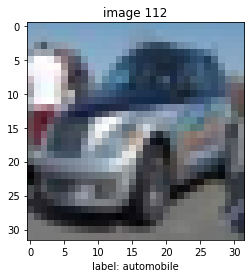

In [4]:
# check how images look
IMG_INDEX = 112

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(f"label: {class_names[train_labels[IMG_INDEX][0]]}")
plt.title(f"image {IMG_INDEX}")
plt.show()

In [5]:
# "A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers."

model = models.Sequential()

# https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
#  ReLU activation function, is perhaps the most common function used for hidden layers. It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4895 - accuracy: 0.4554 - val_loss: 1.2353 - val_accuracy: 0.5567
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1491 - accuracy: 0.5923 - val_loss: 1.1062 - val_accuracy: 0.6067
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0023 - accuracy: 0.6489 - val_loss: 1.0046 - val_accuracy: 0.6526
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8968 - accuracy: 0.6875 - val_loss: 0.9143 - val_accuracy: 0.6816
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8171 - accuracy: 0.7123 - val_loss: 0.8789 - val_accuracy: 0.6947


In [8]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"accuracy: {test_acc}")

313/313 - 1s - loss: 0.8789 - accuracy: 0.6947 - 1s/epoch - 4ms/step
accuracy: 0.6947000026702881


In [9]:
# let's check if ioncreasing filters will increase performance of the model.

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         147584    
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4612 - accuracy: 0.4669 - val_loss: 1.1872 - val_accuracy: 0.5830
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0697 - accuracy: 0.6205 - val_loss: 1.0367 - val_accuracy: 0.6358
Epoch 3/5
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9086 - accuracy: 0.6817 - val_loss: 0.9160 - val_accuracy: 0.6842
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8034 - accuracy: 0.7179 - val_loss: 0.8715 - val_accuracy: 0.7034
Epoch 5/5
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7240 - accuracy: 0.7458 - val_loss: 0.9055 - val_accuracy: 0.6929


In [11]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"accuracy: {test_acc}")

313/313 - 2s - loss: 0.9055 - accuracy: 0.6929 - 2s/epoch - 7ms/step
accuracy: 0.6929000020027161


In [34]:
np.array([num[0] if num == 0 else -1 for num in train_labels])

array([-1, -1, -1, ..., -1, -1, -1])

In [29]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

now check 1 vs all for each class.

In [42]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

for c_i, class_name in enumerate(class_names):
     train_labels_temp = np.array([1 if num == c_i else 0 for num in train_labels])
     test_labels_temp = np.array([1 if num == c_i else 0 for num in test_labels])

     # MODEL PREPARATION
     model = models.Sequential()
     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
     model.add(layers.MaxPooling2D((2, 2)))
     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
     model.add(layers.MaxPooling2D((2, 2)))
     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
     model.add(layers.Flatten())
     model.add(layers.Dense(64, activation='relu'))
     model.add(layers.Dense(2))


     # compiling
     model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
     model.fit(train_images, train_labels_temp, epochs=5, validation_data=(test_images, test_labels_temp))

     # results
     est_loss, test_acc = model.evaluate(test_images, test_labels_temp, verbose=2)
     print(f"{c_i}: {class_name}; accuracy: {test_acc}")

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.2367 - accuracy: 0.9121 - val_loss: 0.1929 - val_accuracy: 0.9251
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1869 - accuracy: 0.9304 - val_loss: 0.1716 - val_accuracy: 0.9344
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.1654 - accuracy: 0.9396 - val_loss: 0.1553 - val_accuracy: 0.9412
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.1495 - accuracy: 0.9460 - val_loss: 0.1489 - val_accuracy: 0.9463
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1362 - accuracy: 0.9492 - val_loss: 0.1495 - val_accuracy: 0.9432
313/313 - 1s - loss: 0.1495 - accuracy: 0.9432 - 1s/epoch - 4ms/step
0: airplane; accuracy: 0.9431999921798706
Epoch 1/5
1563/1563 [==============================] - 20s 12ms/step - loss: 0.1946 - accuracy: 0.9281 - val_loss: 0.1428 - val_accuracy: 0.9459
Epoch 2/5
1563/1563

In [ ]:
# TODO: check metrics change from accuracy to mse

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['mse'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5351 - mse: 38.0379 - val_loss: 1.2769 - val_mse: 41.2943
Epoch 2/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1571 - mse: 43.4421 - val_loss: 1.1072 - val_mse: 44.7517
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0172 - mse: 45.9966 - val_loss: 1.0544 - val_mse: 46.4795
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9217 - mse: 47.7729 - val_loss: 0.9657 - val_mse: 47.9885
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8449 - mse: 50.3419 - val_loss: 0.8935 - val_mse: 48.2789


In [50]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"loss: {est_loss}")

313/313 - 1s - loss: 0.8935 - mse: 48.2789 - 1s/epoch - 4ms/step
loss: 0.8935045003890991
